# K-Nearest Neighbors and Feature Scaling

Goals:

- Learn about the K-Nearest Neighbors machine learning algorithm. How it works and how to use it.
- Use the KNN model on the 2016 Democratic dataset.
- Feature engineering continued: scaling data with standard and minmax scalers.
- How and when to use scaling for you data.
- Class work: compare and contrast KNN and decision tree models on classification supervised learning datasets

## K-Nearest Neighbors

- Known as the "easy" machine learning model
- Classifies an event based on its closest relatives in the data the model has been trained on. Hence the term "Nearest Neighbors". K = number of neighbors.
- Known as a voting classifier because n neighbors vote for the classification.
- Uses Euclidean Distance to calculate similarity.
- Pros: Fast, intuitive, easy to interpret, ability to make probabilities.
- Cons: Poor at handling many features, especially "noisy" features because it treats every feature equally. Not good with small sample sizes. Usually requires scaling. Try not to select more than 20 features.. gets noisy.

![ED](https://www.analyticsvidhya.com/wp-content/uploads/2015/08/EuclideanDistanceGraphic.jpg)

In [1]:
#Imports
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("fivethirtyeight");

/Users/darrenklee/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
#Fake data time
data = make_classification(n_samples=200,
                           n_features=2,
                           n_classes=2,
                           n_informative=2,
                           n_redundant=0,
                            class_sep=.35,
                           random_state=5)

AttributeError: 'tuple' object has no attribute 'head'

In [7]:
#Slice the features and target variable from data

X = data[0]
y = data[1]

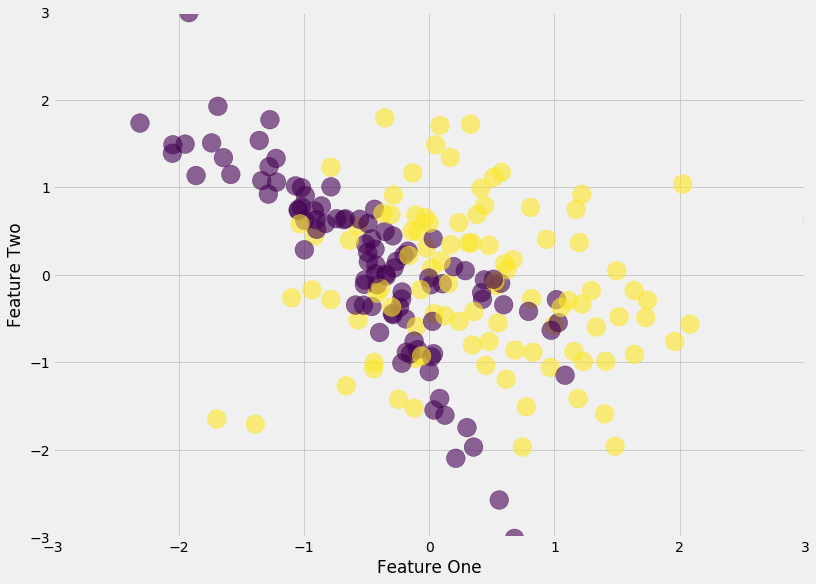

In [11]:
#Plot the data with its color-encodings
plt.figure(figsize=(12,9))
plt.scatter(X[:,0], X[:,1], c=y, s=350, alpha=.6)
plt.xlabel("Feature One")
plt.ylabel("Feature Two")
plt.xlim(-3,3)
plt.ylim(-3,3);

Time to use K-Nearest Neighbors (KNN) to model this data.

Train a KNN model using 3 neighbors

In [10]:
#intialize model and set n_neighbors equal to 3
knn3 = KNeighborsClassifier(n_neighbors=3)
#Fit the model on the "fake data"
knn3.fit(X,y)
#Find the accuracy score of the model on the data
score3 = knn3.score(X,y)
print "The model accurately labelled {:.2f} percent of the data".format(score3*100)

The model accurately labelled 89.50 percent of the data


Now with 5 neighbors

In [13]:
#intialize model and set n_neighbors equal to 5
knn5 = KNeighborsClassifier(n_neighbors=5)
#Fit the model on the "fake data"
knn5.fit(X,y)
#Find the accuracy score of the model on the data
score5 = knn5.score(X,y)
print "The model accurately labelled {:.2f} percent of the data".format(score5*100)

The model accurately labelled 85.00 percent of the data


Apply model on a new point

In [14]:
#New data point
new_data = np.asarray([0.18,0.15]).reshape(1,-1)

#Make predictions on new_data using both models
pred3 = knn3.predict(new_data)
pred5 = knn5.predict(new_data)

#Call those predictions
print "The knn3 model thinks new_data belongs to class {}".format(pred3[0])
print "The knn5 model thinks new_data belongs to class {}".format(pred5[0])

The knn3 model thinks new_data belongs to class 0
The knn5 model thinks new_data belongs to class 1


Look at class probabilities

In [16]:
#Use predict_proba to find class probabilities on new_data
knn3.predict_proba(new_data)

array([[ 0.66666667,  0.33333333]])

In [17]:
#For 5 neighbors
knn5.predict_proba(new_data)

array([[ 0.4,  0.6]])

These probabilites are the vote percentages.

Visualize new point in relation to data

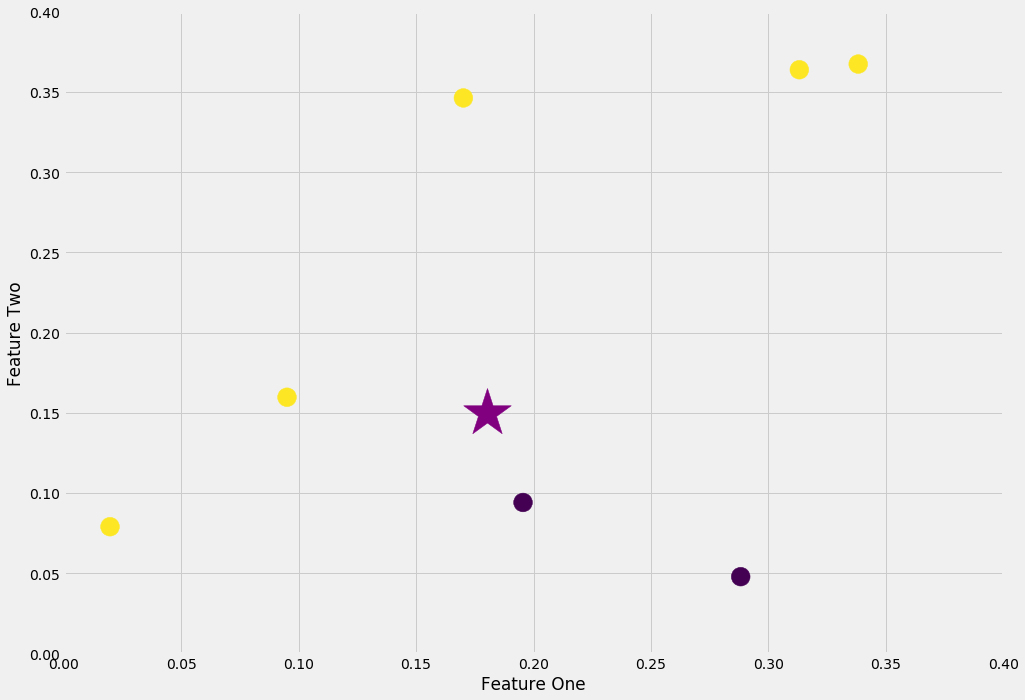

In [18]:
plt.figure(figsize=(15,11))
plt.xlim(0,0.4)
plt.ylim(0,.4)
plt.scatter(X[:,0], X[:,1], c=y, s=350)
#Plot of new_data point
plt.scatter([0.18], [0.15], c="purple",marker="*", s= 2500)
plt.xlabel("Feature One")
plt.ylabel("Feature Two");

Classify the purple star using the KNN method.

Visualizing KNN

In [24]:
#Load in the plot_decision_boundary function
def plot_decision_boundary(model, X, y, n_neighbors):
    X_max = X.max(axis=0)
    X_min = X.min(axis=0)
    xticks = np.linspace(X_min[0], X_max[0], 100)
    yticks = np.linspace(X_min[1], X_max[1], 100)
    xx, yy = np.meshgrid(xticks, yticks)
    ZZ = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = ZZ >= 0.5
    Z = Z.reshape(xx.shape)
    fig, ax = plt.subplots()
    ax = plt.gca()
    ax.contourf(xx, yy, Z, cmap=plt.cm.bwr, alpha=0.2)
    ax.scatter(X[:,0], X[:,1], c=y,s=40, alpha=0.4)
    plt.title("Plot of {} neighbors".format(n_neighbors))
    plt.xlabel("Feature One")
    plt.ylabel("Feature Two")

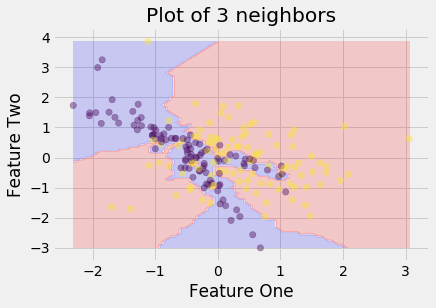

In [25]:
#Visualize the knn3 model
plot_decision_boundary(knn3, X, y, 3);

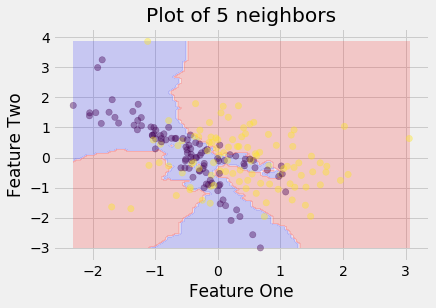

In [21]:
#Visualize the knn5 model
plot_decision_boundary(knn5, X, y, 5);

13 neighbors

In [ ]:
#Plot 13 neighbors
#Fit model first before you plot

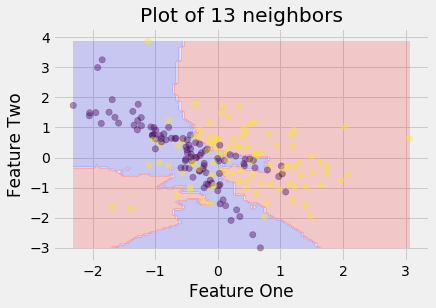

In [28]:
knn13 = KNeighborsClassifier(n_neighbors=13)
knn13.fit(X,y)
plot_decision_boundary(knn13, X, y, 13)

25 neighbors! 

In [ ]:
#Plot 25 neighbors
#Fit model first before you plot

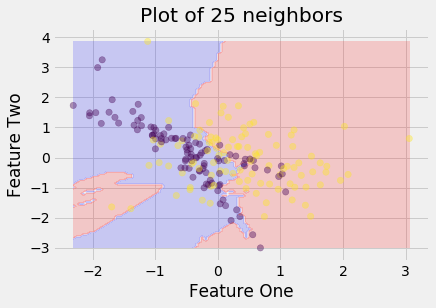

In [30]:
knn25 = KNeighborsClassifier(n_neighbors=25)
knn25.fit(X,y)
plot_decision_boundary(knn25, X, y, 25)

## 2016 Democratic Primary Data

### Data cleaning

Dataset: County-level results of 2016 Democratic Primary and county demographic information.

Kaggle page: https://www.kaggle.com/benhamner/2016-us-election

In [31]:
#Load in data files
primary = pd.read_csv("../data/primary_data//primary_results.csv")
county = pd.read_csv("../data/primary_data/county_facts.csv")
county_dict = pd.read_csv("../data/primary_data/county_facts_dictionary.csv")

In [32]:
#Look at primary
primary.head()

,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes
0,Alabama,AL,Autauga,1001.0,Democrat,Bernie Sanders,544,0.182
1,Alabama,AL,Autauga,1001.0,Democrat,Hillary Clinton,2387,0.800
2,Alabama,AL,Baldwin,1003.0,Democrat,Bernie Sanders,2694,0.329
3,Alabama,AL,Baldwin,1003.0,Democrat,Hillary Clinton,5290,0.647
4,Alabama,AL,Barbour,1005.0,Democrat,Bernie Sanders,222,0.078


In [33]:
#Look at county
county.head()

,fips,area_name,state_abbreviation,PST045214,PST040210,PST120214,POP010210,AGE135214,AGE295214,AGE775214,...,SBO415207,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210
0,0,United States,NaN,318857056,308758105,3.3,308745538,6.2,23.1,14.5,...,8.3,28.8,5319456312,4174286516,3917663456,12990,613795732,1046363,3531905.43,87.4
1,1000,Alabama,NaN,4849377,4780127,1.4,4779736,6.1,22.8,15.3,...,1.2,28.1,112858843,52252752,57344851,12364,6426342,13369,50645.33,94.4
2,1001,Autauga County,AL,55395,54571,1.5,54571,6.0,25.2,13.8,...,0.7,31.7,0,0,598175,12003,88157,131,594.44,91.8
3,1003,Baldwin County,AL,200111,182265,9.8,182265,5.6,22.2,18.7,...,1.3,27.3,1410273,0,2966489,17166,436955,1384,1589.78,114.6
4,1005,Barbour County,AL,26887,27457,-2.1,27457,5.7,21.2,16.5,...,0.0,27.0,0,0,188337,6334,0,8,884.88,31.0


In [34]:
#Look at county_dict
county_dict.head()

,column_name,description
0,PST045214,"Population, 2014 estimate"
1,PST040210,"Population, 2010 (April 1) estimates base"
2,PST120214,"Population, percent change - April 1, 2010 to ..."
3,POP010210,"Population, 2010"
4,AGE135214,"Persons under 5 years, percent, 2014"


Our immediate task: clean up column names in county using county_dict

In [37]:
#Make a dictionary of the data in the column_name and descripition columns of county_dict
replacement_columns = dict(county_dict.values)

In [38]:
#Look at dictionary
replacement_columns

{'AFN120207': 'Accommodation and food services sales, 2007 ($1,000)',
 'AGE135214': 'Persons under 5 years, percent, 2014',
 'AGE295214': 'Persons under 18 years, percent, 2014',
 'AGE775214': 'Persons 65 years and over, percent, 2014',
 'BPS030214': 'Building permits, 2014',
 'BZA010213': 'Private nonfarm establishments, 2013',
 'BZA110213': 'Private nonfarm employment,  2013',
 'BZA115213': 'Private nonfarm employment, percent change, 2012-2013',
 'EDU635213': 'High school graduate or higher, percent of persons age 25+, 2009-2013',
 'EDU685213': "Bachelor's degree or higher, percent of persons age 25+, 2009-2013",
 'HSD310213': 'Persons per household, 2009-2013',
 'HSD410213': 'Households, 2009-2013',
 'HSG010214': 'Housing units, 2014',
 'HSG096213': 'Housing units in multi-unit structures, percent, 2009-2013',
 'HSG445213': 'Homeownership rate, 2009-2013',
 'HSG495213': 'Median value of owner-occupied housing units, 2009-2013',
 'INC110213': 'Median household income, 2009-2013',
 '

In [39]:
#Rename columns in county using the replacement_columns dictionary
county.rename(columns=replacement_columns, inplace=True)

In [40]:
#Look at county 
county

,fips,area_name,state_abbreviation,"Population, 2014 estimate","Population, 2010 (April 1) estimates base","Population, percent change - April 1, 2010 to July 1, 2014","Population, 2010","Persons under 5 years, percent, 2014","Persons under 18 years, percent, 2014","Persons 65 years and over, percent, 2014",...,"Hispanic-owned firms, percent, 2007","Women-owned firms, percent, 2007","Manufacturers shipments, 2007 ($1,000)","Merchant wholesaler sales, 2007 ($1,000)","Retail sales, 2007 ($1,000)","Retail sales per capita, 2007","Accommodation and food services sales, 2007 ($1,000)","Building permits, 2014","Land area in square miles, 2010","Population per square mile, 2010"
0,0,United States,NaN,318857056,308758105,3.3,308745538,6.2,23.1,14.5,...,8.3,28.8,5319456312,4174286516,3917663456,12990,613795732,1046363,3531905.43,87.4
1,1000,Alabama,NaN,4849377,4780127,1.4,4779736,6.1,22.8,15.3,...,1.2,28.1,112858843,52252752,57344851,12364,6426342,13369,50645.33,94.4
2,1001,Autauga County,AL,55395,54571,1.5,54571,6.0,25.2,13.8,...,0.7,31.7,0,0,598175,12003,88157,131,594.44,91.8
3,1003,Baldwin County,AL,200111,182265,9.8,182265,5.6,22.2,18.7,...,1.3,27.3,1410273,0,2966489,17166,436955,1384,1589.78,114.6
4,1005,Barbour County,AL,26887,27457,-2.1,27457,5.7,21.2,16.5,...,0.0,27.0,0,0,188337,6334,0,8,884.88,31.0
5,1007,Bibb County,AL,22506,22919,-1.8,22915,5.3,21.0,14.8,...,0.0,0.0,0,0,124707,5804,10757,19,622.58,36.8
6,1009,Blount County,AL,57719,57322,0.7,57322,6.1,23.6,17.0,...,0.0,23.2,341544,0,319700,5622,20941,3,644.78,88.9
7,1011,Bullock County,AL,10764,10915,-1.4,10914,6.3,21.4,14.9,...,0.0,38.8,0,0,43810,3995,3670,1,622.81,17.5
8,1013,Butler County,AL,20296,20946,-3.1,20947,6.1,23.6,18.0,...,0.0,0.0,399132,56712,229277,11326,28427,2,776.83,27.0
9,1015,Calhoun County,AL,115916,118586,-2.3,118572,5.7,22.2,16.0,...,0.5,24.7,2679991,0,1542981,13678,186533,114,605.87,195.7


Yikes!

In [41]:
#List of index values for the columns we are going to use in this dataset
subset_col_index = [0,3,5,9,10,12,18,20,23,25,33,34,53]

In [1]:
#Filter county data using subset_col_index
county = county.iloc[:, subset_col_index]
county.info()

NameError: name 'county' is not defined

In [45]:
#I did the dirty work for you and created this list of new column names
subset_cols = ["fips","population", "pop_change", "senior_pop_per", "female_pop_per", "black_pop_per",
               "white_pop_per", "foreign_pop_per", "college_degree_pop_", "commute_time", "median_income",
               "poverty_rate", "pop_density"]

In [46]:
#make a dictionary of old column names and the new ones
col_dict = dict(zip(county.columns, subset_cols))
#Use dictionary to rename the columns
county.rename(columns=col_dict, inplace=True)
county.head()

/Users/darrenklee/anaconda2/lib/python2.7/site-packages/pandas/core/frame.py:2746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


,fips,population,pop_change,senior_pop_per,female_pop_per,black_pop_per,white_pop_per,foreign_pop_per,college_degree_pop_,commute_time,median_income,poverty_rate,pop_density
0,0,318857056,3.3,14.5,50.8,13.2,62.1,12.9,28.8,25.5,53046,15.4,87.4
1,1000,4849377,1.4,15.3,51.5,26.7,66.2,3.5,22.6,24.2,43253,18.6,94.4
2,1001,55395,1.5,13.8,51.4,18.7,75.6,1.6,20.9,26.2,53682,12.1,91.8
3,1003,200111,9.8,18.7,51.2,9.6,83.0,3.6,27.7,25.9,50221,13.9,114.6
4,1005,26887,-2.1,16.5,46.6,47.6,46.6,2.9,13.4,24.6,32911,26.7,31.0


Much better

In [47]:
#Check for nulls in county and primary
primary.isnull().sum()

state                   0
state_abbreviation      0
county                  0
fips                  100
party                   0
candidate               0
votes                   0
fraction_votes          0
dtype: int64

In [48]:
#Drop nulls from primary
primary.dropna(inplace=True)

In [49]:
primary.isnull().sum()

state                 0
state_abbreviation    0
county                0
fips                  0
party                 0
candidate             0
votes                 0
fraction_votes        0
dtype: int64

Filter primary down to just Bernie and Hillary and join data frames.

In [50]:
#Make separate data frames for each candidate
bern = primary[primary.candidate == "Bernie Sanders"]
hill = primary[primary.candidate == "Hillary Clinton"]

In [51]:
#Filter bern dataframe to just county id, candidate, and votes
bern = bern[["fips", "candidate", "votes"]]

In [52]:
#Join hill and bern data frames on fips column
dem = pd.merge(hill, bern, on="fips")

In [53]:
#Lets see what that gives us
dem.head()

,state,state_abbreviation,county,fips,party,candidate_x,votes_x,fraction_votes,candidate_y,votes_y
0,Alabama,AL,Autauga,1001.0,Democrat,Hillary Clinton,2387,0.800,Bernie Sanders,544
1,Alabama,AL,Baldwin,1003.0,Democrat,Hillary Clinton,5290,0.647,Bernie Sanders,2694
2,Alabama,AL,Barbour,1005.0,Democrat,Hillary Clinton,2567,0.906,Bernie Sanders,222
3,Alabama,AL,Bibb,1007.0,Democrat,Hillary Clinton,942,0.755,Bernie Sanders,246
4,Alabama,AL,Blount,1009.0,Democrat,Hillary Clinton,564,0.551,Bernie Sanders,395


In [54]:
#Check for nulls
dem.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4195 entries, 0 to 4194
Data columns (total 10 columns):
state                 4195 non-null object
state_abbreviation    4195 non-null object
county                4195 non-null object
fips                  4195 non-null float64
party                 4195 non-null object
candidate_x           4195 non-null object
votes_x               4195 non-null int64
fraction_votes        4195 non-null float64
candidate_y           4195 non-null object
votes_y               4195 non-null int64
dtypes: float64(2), int64(2), object(6)
memory usage: 360.5+ KB


In [55]:
#Rename votes_x and votes_y column

dem.rename(columns={"votes_x":"clinton_votes", "votes_y":"sanders_votes"}, inplace = True)

In [56]:
dem.head()

,state,state_abbreviation,county,fips,party,candidate_x,clinton_votes,fraction_votes,candidate_y,sanders_votes
0,Alabama,AL,Autauga,1001.0,Democrat,Hillary Clinton,2387,0.800,Bernie Sanders,544
1,Alabama,AL,Baldwin,1003.0,Democrat,Hillary Clinton,5290,0.647,Bernie Sanders,2694
2,Alabama,AL,Barbour,1005.0,Democrat,Hillary Clinton,2567,0.906,Bernie Sanders,222
3,Alabama,AL,Bibb,1007.0,Democrat,Hillary Clinton,942,0.755,Bernie Sanders,246
4,Alabama,AL,Blount,1009.0,Democrat,Hillary Clinton,564,0.551,Bernie Sanders,395


In [59]:
#Create new column in dem that is difference between Hillary and Bernie votes
dem["winner"] = dem.clinton_votes - dem.sanders_votes

In [60]:
#Create a function that converts positive integers in the winner column to H for hillary
#0 for Tie and negative integers into B for bernie
def vote_winner(x):
    if x > 0:
        return "H"
    elif x == 0:
        return "TIE"
    else:
        return "B"

In [61]:
#Apply function onto the winner column and overwrite it
dem["winner"] = dem.winner.apply(vote_winner)

In [63]:
#Let's look at class percentages
dem.winner.value_counts(normalize=True)

B      0.519905
H      0.437902
TIE    0.042193
Name: winner, dtype: float64

In [64]:
#Drop all rows with TIE
dem = dem[dem.winner != "TIE"]

In [65]:
#Check shape
dem.shape

(4018, 12)

In [66]:
#Filter dem data frame to just fips and winner
dem = dem[["fips", "winner"]]

In [71]:
#Join the county and dem data frames on the fips column
df = pd.merge(county, dem, on = "fips")

In [68]:
#Look at data
df.head()

,fips,population,pop_change,senior_pop_per,female_pop_per,black_pop_per,white_pop_per,foreign_pop_per,college_degree_pop_,commute_time,median_income,poverty_rate,pop_density,winner
0,1001,55395,1.5,13.8,51.4,18.7,75.6,1.6,20.9,26.2,53682,12.1,91.8,H
1,1003,200111,9.8,18.7,51.2,9.6,83.0,3.6,27.7,25.9,50221,13.9,114.6,H
2,1005,26887,-2.1,16.5,46.6,47.6,46.6,2.9,13.4,24.6,32911,26.7,31.0,H
3,1007,22506,-1.8,14.8,45.9,22.1,74.5,1.2,12.1,27.6,36447,18.1,36.8,H
4,1009,57719,0.7,17.0,50.5,1.8,87.8,4.3,12.1,33.9,44145,15.8,88.9,H


In [72]:
#Assign fips as index column
df.set_index("fips", inplace=True)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2769 entries, 1001 to 56043
Data columns (total 13 columns):
population             2769 non-null int64
pop_change             2769 non-null float64
senior_pop_per         2769 non-null float64
female_pop_per         2769 non-null float64
black_pop_per          2769 non-null float64
white_pop_per          2769 non-null float64
foreign_pop_per        2769 non-null float64
college_degree_pop_    2769 non-null float64
commute_time           2769 non-null float64
median_income          2769 non-null int64
poverty_rate           2769 non-null float64
pop_density            2769 non-null float64
winner                 2769 non-null object
dtypes: float64(10), int64(2), object(1)
memory usage: 382.9+ KB


Time for some modeling. We're going to use KNN to classify counties as Hillary or Bernie.

In [73]:
#Check null accuracy
df.winner.value_counts(normalize=True)
#if we predicted that everyone voted for H, then we would be correct 59% of the time. We need to beat this!

H    0.592272
B    0.407728
Name: winner, dtype: float64

In [74]:
#Assign X and y

X = df.drop("winner", axis =1)
y = df.winner

In [75]:
#Fit model using a single neighbor
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X,y)
knn1.score(X,y)

1.0

Perfect model!!!!

Oh wait

In [78]:
#Fit model using three neighbors
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(X,y)
knn3.score(X,y)

0.76814734561213438

What happened here?

In [83]:
#higher than the null accuracy

What about 7 neighbors?

In [79]:
#Fit model using seven neighbors

knn7 = KNeighborsClassifier(n_neighbors=7)
knn7.fit(X,y)
knn7.score(X,y)

0.70386421090646445

In [82]:
#decreases the accuracy

Let's try something much higher

In [80]:
#Fit model using 29 neighbors
knn29 = KNeighborsClassifier(n_neighbors=29)
knn29.fit(X,y)
knn29.score(X,y)

0.65222101841820157

In [81]:
#adding more neighbors looks like it decreases accuracy. 
#Never use more than 20% of your dataset. Won't be in the same city, or region when you go above this number. 


Try it out on a testing set

In [84]:
#Make a train/test split. Set test_size = .25
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=.25, 
                                                    random_state=42)

Fit model with 5 neighbors on training data and test model on testing data

In [86]:
#Fit model on training data
knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(X_train, y_train)
knn5.score(X_test, y_test)

0.58008658008658009

In [ ]:
#this is worst than the null accuracy

In [87]:
#Call confusion_matrix 
preds = knn5.predict(X_test)
confusion_matrix(y_test, preds)


array([[126, 157],
       [134, 276]])

In [91]:
# predicted 126 as Bernie which is correct, and 276 is correctly predicted for Hillary. 
#The Array is in Alphabetical order

Good or bad?
<br><br>
Let's increase number of neighbors

In [88]:
#BAD. 

In [92]:
#Fit model on training data
knn17 = KNeighborsClassifier(n_neighbors=17)
knn17.fit(X_train, y_train)
knn17.score(X_test, y_test)

0.59307359307359309

In [93]:
#still getting accuracy worst than null..

Big difference?

Cross validation time.
<br><br>
Class exercise time: Make a validation curve plot of neighbors vs the 5-fold cross validated accuracy score of a KNN model. Use odd numbers from 3 to 39.

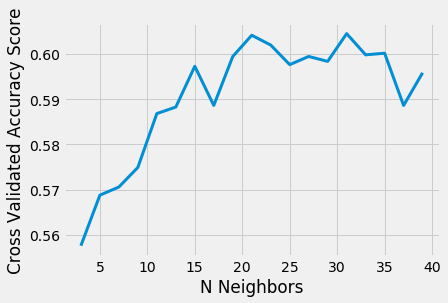

In [99]:
#Answer
neighbors = range(3, 41, 2)

cv_scores = []

for i in neighbors:
    cv = cross_val_score(KNeighborsClassifier(n_neighbors=i), X, y, cv =5, scoring="accuracy")
    cv_mean = cv.mean()
    cv_scores.append(cv_mean)
    
plt.plot(neighbors, cv_scores, linewidth = 3)
plt.xlabel("N Neighbors")
plt.ylabel("Cross Validated Accuracy Score");

Which neighbor value/s produces the best accuracy score?
<br><br>
How does that compare to the null accuracy?

In [100]:
#Not statistically differently far from the null...

What is the issue here? We can't seem to build a model that can significantly beat our null accuracy.
<br><br>
Think about the features and how they differ from each other.

In [101]:
#The Data is not scaled!


## Scaling Data
<br><br>
[Feature scaling:](https://en.wikipedia.org/wiki/Feature_scaling) A method used to standardize the range of independent variables or features of data

Let's take a look at this sample data set.

In [102]:
#Initialize data
sample = {"income":[30000, 55000, 36000], 
          "white_pop":[50, 85, 95], 
          "college_deg":[15, 40, 50], 
          "class":["A","B", "X"]}

sample= pd.DataFrame(sample)
sample

,class,college_deg,income,white_pop
0,A,15,30000,50
1,B,40,55000,85
2,X,50,36000,95


Which class is row 2 closer to? A or B?
Let's use euclidean distance to figure that out.

In [106]:
#Assign rows in data to variables
class_A = sample.iloc[0, 1:].values
class_B = sample.iloc[1, 1:].values
class_X = sample.iloc[2, 1:].values

In [107]:
#Euclidean distance between class A and class x
(((class_A - class_X)**2).sum())**0.5

6000.2708272210511

In [108]:
#Euclidean distance between class B and class x
(((class_B - class_X)**2).sum())**0.5

19000.005263157167

In [109]:
#Therefore, classX is closer to classA!

Which class should class_X be assigned to based on this calculation? Do you agree or disagree

This example demonstrates the necessity of feature scaling.

From [Sebastian Raschka](http://sebastianraschka.com/Articles/2014_about_feature_scaling.html)

<b>Standardization</b>: "The result of standardization (or Z-score normalization) is that the features will be rescaled so that they’ll have the properties of a standard normal distribution with μ=0μ=0  and σ=1

Where μ is the mean (average) and σσ is the standard deviation from the mean; standard scores (also called z scores) of the samples are calculated as follows:"
![e](https://www.analyticsvidhya.com/wp-content/uploads/2015/11/ZFormula.jpg)
<br><br>
<b>MinMax Scaling</b>: "An alternative approach to Z-score normalization (or standardization) is the so-called Min-Max scaling (often also simply called “normalization” - a common cause for ambiguities).
In this approach, the data is scaled to a fixed range - usually 0 to 1.
The cost of having this bounded range - in contrast to standardization - is that we will end up with smaller standard deviations, which can suppress the effect of outliers.

A Min-Max scaling is typically done via the following equation:"
![d](https://qph.ec.quoracdn.net/main-qimg-0d692d88876aeb26b1f1a578d1c5a94e)

Let's scale the features using StandardScaler and MinMaxScaler

In [110]:
#Imports
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [112]:
#Intialize scalers
ss = StandardScaler()
mm = MinMaxScaler()

#Fit data on scalers
ss.fit(X)
mm.fit(X);

We don't have any data yet, we need then transform the data using the fit scalers

In [113]:
#Use ss and mm to transform X
X_ss = ss.transform(X)
X_mm = mm.transform(X)

In [114]:
X_ss

array([[-0.14882254,  0.27848056, -0.85150367, ...,  0.72173773,
        -0.79598225, -0.09788742],
       [ 0.29371226,  2.41210562,  0.27322126, ...,  0.42940837,
        -0.51850745, -0.08525639],
       [-0.23599868, -0.64694718, -0.23175728, ..., -1.03266072,
         1.4546467 , -0.13157017],
       ..., 
       [-0.248099  ,  1.87227277, -1.21876079, ...,  1.93767918,
        -1.39717765, -0.14580777],
       [-0.25429441, -0.36417759, -1.49420363, ...,  1.12995147,
        -0.61099905, -0.14314861],
       [-0.29276958, -0.74977249,  0.59457124, ...,  0.16613458,
        -0.79598225, -0.14663876]])

We can fit and transform at the same time

In [115]:
#Intialize scalers
ss = StandardScaler()
mm = MinMaxScaler()

#Fit and transform data using scalers
X_ss = ss.fit_transform(X)
X_mm = mm.fit_transform(X)

In [116]:
#Make data frames from scaled data. Use columns from X

X_ss = pd.DataFrame(X_ss, columns = X.columns)
X_mm = pd.DataFrame(X_mm, columns = X.columns)

In [117]:
#Take a look at both data frames
X_ss.head()

,population,pop_change,senior_pop_per,female_pop_per,black_pop_per,white_pop_per,foreign_pop_per,college_degree_pop_,commute_time,median_income,poverty_rate,pop_density
0,-0.148823,0.278481,-0.851504,0.622683,0.565499,-0.027820,-0.527947,0.178889,0.518359,0.721738,-0.795982,-0.097887
1,0.293712,2.412106,0.273221,0.535213,-0.039386,0.342080,-0.170632,0.950101,0.461523,0.429408,-0.518507,-0.085256
2,-0.235999,-0.646947,-0.231757,-1.476598,2.486508,-1.477430,-0.295692,-0.671712,0.215234,-1.032661,1.454647,-0.131570
3,-0.249396,-0.569828,-0.621968,-1.782744,0.791500,-0.082805,-0.599411,-0.819149,0.783594,-0.733997,0.128934,-0.128357
4,-0.141716,0.072830,-0.116989,0.229068,-0.557859,0.582016,-0.045571,-0.819149,1.977151,-0.083794,-0.225617,-0.099494


In [118]:
X_mm.head()

,population,pop_change,senior_pop_per,female_pop_per,black_pop_per,white_pop_per,foreign_pop_per,college_degree_pop_,commute_time,median_income,poverty_rate,pop_density
0,0.005467,0.454545,0.198770,0.797753,0.219741,0.759162,0.031189,0.248596,0.500000,0.329539,0.214149,0.001320
1,0.019772,0.658477,0.299180,0.790262,0.112808,0.836649,0.070175,0.344101,0.491667,0.295691,0.248566,0.001648
2,0.002649,0.366093,0.254098,0.617978,0.559342,0.455497,0.056530,0.143258,0.455556,0.126403,0.493308,0.000445
3,0.002216,0.373464,0.219262,0.591760,0.259694,0.747644,0.023392,0.125000,0.538889,0.160985,0.328872,0.000528
4,0.005697,0.434889,0.264344,0.764045,0.021152,0.886911,0.083821,0.125000,0.713889,0.236269,0.284895,0.001278


In [119]:
#What happens when you call .describe() on X_ss
X_ss.describe()

,population,pop_change,senior_pop_per,female_pop_per,black_pop_per,white_pop_per,foreign_pop_per,college_degree_pop_,commute_time,median_income,poverty_rate,pop_density
count,2.769000e+03,2.769000e+03,2.769000e+03,2.769000e+03,2.769000e+03,2.769000e+03,2.769000e+03,2.769000e+03,2.769000e+03,2.769000e+03,2.769000e+03,2.769000e+03
mean,-4.270089e-18,-1.368834e-16,5.410784e-16,1.488196e-15,-5.244390e-17,-1.033843e-16,-4.972247e-17,3.570436e-17,7.334128e-16,1.133277e-16,2.190776e-16,7.467643e-18
std,1.000181e+00,1.000181e+00,1.000181e+00,1.000181e+00,1.000181e+00,1.000181e+00,1.000181e+00,1.000181e+00,1.000181e+00,1.000181e+00,1.000181e+00,1.000181e+00
min,-3.179549e-01,-4.477190e+00,-3.078000e+00,-8.692878e+00,-6.775061e-01,-3.651845e+00,-8.138002e-01,-1.828529e+00,-2.891802e+00,-2.124356e+00,-2.522492e+00,-1.486885e-01
25%,-2.799873e-01,-6.212409e-01,-6.219680e-01,-1.645473e-01,-6.176823e-01,-5.976668e-01,-5.994107e-01,-6.943944e-01,-6.941425e-01,-6.461542e-01,-6.880754e-01,-1.372763e-01
50%,-2.349804e-01,-1.585270e-01,-9.403586e-02,1.853329e-01,-4.847405e-01,3.370815e-01,-3.671553e-01,-2.634232e-01,-6.894627e-02,-1.466350e-01,-1.022952e-01,-1.218199e-01
75%,-9.862318e-02,4.841312e-01,5.257105e-01,4.914781e-01,1.733212e-01,8.269496e-01,1.866843e-01,3.830336e-01,6.320314e-01,4.408955e-01,5.605612e-01,-8.054745e-02
max,3.061820e+01,5.985285e+00,8.123342e+00,2.984375e+00,4.979166e+00,1.121870e+00,8.351353e+00,6.246510e+00,3.928521e+00,6.512241e+00,5.539692e+00,3.833573e+01


What do you notice about the means and standard deviations?

In [120]:
# Mean is around 0, and Standard Dev is around 1.

What happens when we receive new data? How do we scale it using the scale of our previous data?

In [123]:
#Select San Francisco and Santa Cruz counties
ba = county[(county.fips==6075) | (county.fips==6087)].drop("fips", axis=1)
ba

,population,pop_change,senior_pop_per,female_pop_per,black_pop_per,white_pop_per,foreign_pop_per,college_degree_pop_,commute_time,median_income,poverty_rate,pop_density
229,852469,5.9,14.4,49.1,5.8,41.2,35.6,52.4,30.5,75604,13.5,17179.1
235,271804,3.6,13.5,50.4,1.4,58.2,18.3,37.0,25.4,66519,14.6,589.4


In [122]:
#Use the ss scaler object used to fit and transform X to transform ba.
ba_ss = ss.transform(ba)
ba_ss

array([[ 2.28859267,  1.4095589 , -0.71378225, -0.38322249, -0.29197498,
        -1.74735729,  5.54642291,  3.75141389,  1.33300903,  2.57335405,
        -0.58016851,  9.36834919],
       [ 0.51294611,  0.8183134 , -0.92036438,  0.18533292, -0.58444687,
        -0.89758608,  2.45564033,  2.00484635,  0.3667966 ,  1.80600006,
        -0.41060058,  0.17777926]])

In [124]:
#Use the mm scaler object used to fit and transform X to transform ba.
ba_mm = mm.transform(ba)
ba_mm

array([[ 0.08425572,  0.56265356,  0.21106557,  0.71161049,  0.06815511,
         0.39895288,  0.69395712,  0.69101124,  0.61944444,  0.54393068,
         0.24091778,  0.24729585],
       [ 0.02685858,  0.50614251,  0.19262295,  0.76029963,  0.01645123,
         0.57696335,  0.35672515,  0.4747191 ,  0.47777778,  0.45508156,
         0.26195029,  0.00848312]])

Class exercise time: 

Work with partner to investigate whether or not our model significantly improves when using scaled data. Which scaler improves our modeling more? Use cross validation and charts and examine as many neighbors as possible.


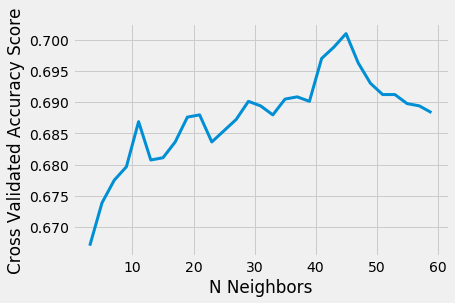

In [131]:
#Answer
neighbors = range(3, 61, 2)

cv_scores = []

for i in neighbors:
    cv = cross_val_score(KNeighborsClassifier(n_neighbors=i), X_ss, y, cv =5, scoring="accuracy")
    cv_mean = cv.mean()
    cv_scores.append(cv_mean)
    
plt.plot(neighbors, cv_scores, linewidth = 3)
plt.xlabel("N Neighbors")
plt.ylabel("Cross Validated Accuracy Score");

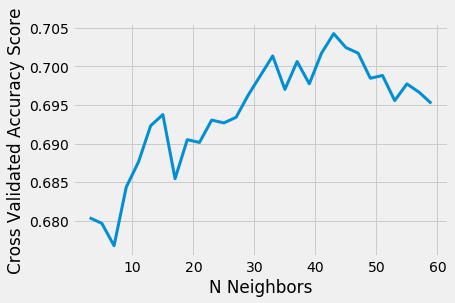

In [130]:
#Answer
neighbors = range(3, 61, 2)

cv_scores = []

for i in neighbors:
    cv = cross_val_score(KNeighborsClassifier(n_neighbors=i), X_mm, y, cv =5, scoring="accuracy")
    cv_mean = cv.mean()
    cv_scores.append(cv_mean)
    
plt.plot(neighbors, cv_scores, linewidth = 3)
plt.xlabel("N Neighbors")
plt.ylabel("Cross Validated Accuracy Score");

In [128]:
knn33 = KNeighborsClassifier(n_neighbors=33)
knn33.fit(X_train, y_train)
knn33.score(X_test, y_test)

0.60461760461760461

In [132]:
#scaling increases our accuracy score by ~10%!

### Resources:
<br>
KNN:
- https://kevinzakka.github.io/2016/07/13/k-nearest-neighbor/
- https://www.dataquest.io/blog/k-nearest-neighbors-in-python/
- https://saravananthirumuruganathan.wordpress.com/2010/05/17/a-detailed-introduction-to-k-nearest-neighbor-knn-algorithm/
- http://people.revoledu.com/kardi/tutorial/KNN/index.html
<br><br>

Feature scaling:

- https://machinelearningmastery.com/scale-machine-learning-data-scratch-python/
- https://www.datacamp.com/community/tutorials/preprocessing-in-data-science-part-1-centering-scaling-and-knn
- https://pythonprogramming.net/preprocessing-machine-learning/


## In-class lab.
<br><br>
For the rest of class work on modeling one of the following datasets: primary, spotify, employee churn (HR_comma_sep.csv), iris, titanic, or use fake data from sklearn.
<br><br>
Compare and contrast decision trees with KNN. Drop and transform features. Play around as much as possible with the data and see if that improves your model.
<br><br>
Check out bonus lesson in which I use KNN-like algorithm to determine similarities between soccer players and decide which city Amazon should choose for their new headquarters.

### Spotify data

A dataset of songs I like and dislike and their attributes from Spotify. 1 = like, 0 = dislike<br><br>



<b>Attributes:</b>

        Acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
        
        Danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
        
        Instrumentalness: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
        
        Valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
        
        Energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
        
More details: https://developer.spotify.com/web-api/get-audio-features/

My article using this dataset: https://opendatascience.com/blog/a-machine-learning-deep-dive-into-my-spotify-data/

In [155]:
music = pd.read_pickle("../data/Spotify_Data.pkl")
music.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2017 entries, Mask_Off***Future to I_Wanna_Get_Better***Bleachers
Data columns (total 9 columns):
acousticness        2017 non-null float64
mode                2017 non-null int64
tempo               2017 non-null float64
loudness            2017 non-null float64
danceability        2017 non-null float64
instrumentalness    2017 non-null float64
valence             2017 non-null float64
energy              2017 non-null float64
target              2017 non-null int64
dtypes: float64(7), int64(2)
memory usage: 157.6+ KB


In [146]:
#Intialize scalers
ss = StandardScaler()
mm = MinMaxScaler()

#Fit and transform data using scalers
music_ss = ss.fit_transform(music)
music_mm = mm.fit_transform()

In [147]:
#Make data frames from scaled data. Use columns from X

music_ss = pd.DataFrame(music_ss, columns = music.columns)
music_mm = pd.DataFrame(music_mm, columns = music.columns)

In [148]:
music_ss.head()

,acousticness,mode,tempo,loudness,danceability,instrumentalness,valence,energy,target
0,-0.682467,0.795738,1.066709,-0.454530,1.332874,-0.407864,-0.853039,-1.177700,0.988661
1,0.043897,0.795738,1.442323,-0.881573,0.773830,-0.465683,0.368970,-1.534468,0.988661
2,-0.589363,0.795738,-1.745166,-0.016586,1.363932,-0.487200,-1.310280,-1.282352,0.988661
3,1.602040,0.795738,-1.316964,-2.167220,-0.772860,1.379429,-1.079636,-1.634363,0.988661
4,-0.029201,-1.256696,1.964120,-1.213155,0.370075,1.386753,1.647627,-0.573574,0.988661


In [149]:
music.target.value_counts(normalize=True)

1    0.505702
0    0.494298
Name: target, dtype: float64

In [156]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier